## BBC Text MultiClass Classification - RMDL: Random Multimodel Deep Learning

Random Multimodel Deep Learning is a new ensemble, deep learning approach for classification. Deep learning models have achieved state-of-the-art results across many domains. RMDL solves the problem of finding the best deep learning structure and architecture while simultaneously improving robustness and accuracy through ensembles of deep learning architectures. RDML can accept as input a variety data to include text, video, images, and symbolic.

RMDL includes 3 Random models, oneDNN classifier at left, one Deep CNN classifier at middle, and one Deep RNN classifier at right (each unit could be LSTMor GRU).

[![RMDL](https://camo.githubusercontent.com/9c65085618b4e97694a05b9dce9db3771679bd34/687474703a2f2f6b6f77736172692e6e65742f6f6e657765626d656469612f524d444c2e6a7067)](https://github.com/kk7nc/RMDL)

Find more details about Random Multimodel Deep Learning at [RMDL](https://github.com/kk7nc/RMDL)

In [1]:
# load packages
from RMDL import text_feature_extraction as txt
from keras.datasets import imdb
import numpy as np
from RMDL import RMDL_Text as RMDL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing

Using TensorFlow backend.


sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


[nltk_data] Downloading package stopwords to /home/syava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the dataset
trainDF = pd.read_csv('bbc-text.csv') # encoding = "latin"

In [3]:
trainDF.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [4]:
trainDF.shape

(2225, 2)

In [5]:
trainDF['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [6]:
trainDF['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

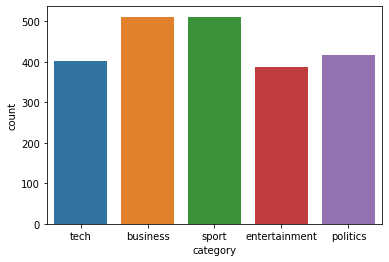

In [7]:
sns.countplot(trainDF['category'])

## Data preparation

In [8]:
text = trainDF['text'].values
encoder = preprocessing.LabelEncoder()
labels = encoder.fit_transform(trainDF['category'].values)

In [9]:
#split the data into train and test dataset

split_data = int(len(text) * 0.85)

train_text = text[:split_data]
train_labels = labels[:split_data]

test_text = text[split_data:]
test_labels = labels[split_data:]

In [10]:
#batch_size should not be very small neither too big
batch_size = 128

#epoch for DNN , RNN and CNN
n_epochs = [5, 5, 5]  ## DNN--RNN-CNN
Random_Deep = [3, 3, 3]  ## DNN--RNN-CNN
no_of_classes = 5
RMDL.Text_Classification(np.array(train_text), np.array(train_labels), np.array(test_text),
                         np.array(test_labels),
                         GloVe_dir = '/home/Documents/Glove/glove.6B',
                         batch_size=batch_size,
                         sparse_categorical=True,
                         random_deep=Random_Deep,
                         epochs=n_epochs, no_of_classes=no_of_classes)

Done1
tf-idf with 27702 features
/home/syava/Documents/work_files/innoclique/pdf_work/new_work/modeling/Glove/glove.6B/glove.6B.50d.txt
Found 29726 unique tokens.
(2225, 500)
Total 400000 word vectors.
5
DNN 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1891 samples, validate on 334 samples
Epoch 1/5
 - 8s - loss: 1.5970 - acc: 0.2258 - val_loss: 1.5536 - val_acc: 0.2275

Epoch 00001: val_acc improved from -inf to 0.22754, saving model to weights\weights_DNN_0.hdf5
Epoch 2/5
 - 6s - loss: 1.3455 - acc: 0.2977 - val_loss: 1.2099 - val_acc: 0.4132

Epoch 00002: val_acc improved from 0.22754 to 0.41317, saving model to weights\weights_DNN_0.hdf5
Epoch 3/5
 - 6s - loss: 1.1901 - acc: 0.4379 - val_loss: 1.2143 - val_acc: 0.5868

Epoch 00003: val_acc improved from 0.41317 to 0.58683, saving mode

Epoch 3/5
 - 154s - loss: 12.4928 - acc: 0.2226 - val_loss: 12.0162 - val_acc: 0.2545

Epoch 00003: val_acc did not improve from 0.25449
Epoch 4/5
 - 155s - loss: 12.4956 - acc: 0.2247 - val_loss: 12.0162 - val_acc: 0.2545

Epoch 00004: val_acc did not improve from 0.25449
Epoch 5/5
 - 160s - loss: 12.4956 - acc: 0.2247 - val_loss: 12.0162 - val_acc: 0.2545

Epoch 00005: val_acc did not improve from 0.25449
CNN 2
Filter   7
Node   353
Train on 1891 samples, validate on 334 samples
Epoch 1/5
 - 156s - loss: 11.7781 - acc: 0.2247 - val_loss: 12.4505 - val_acc: 0.2275

Epoch 00001: val_acc improved from -inf to 0.22754, saving model to weights\weights_CNN_2.hdf5
Epoch 2/5
 - 144s - loss: 12.4103 - acc: 0.2300 - val_loss: 12.4505 - val_acc: 0.2275

Epoch 00002: val_acc did not improve from 0.22754
Epoch 3/5
 - 145s - loss: 12.4103 - acc: 0.2300 - val_loss: 12.4505 - val_acc: 0.2275

Epoch 00003: val_acc did not improve from 0.22754
Epoch 4/5
 - 149s - loss: 12.4103 - acc: 0.2300 - val_loss

Accuracy: 0.9730538922155688